# Metodos Numéricos
##### Segundo Parcial, 10 de junio de 2021, Julia

## Importante

1. Realice este exámen en una notebook de jupyter. 

2. Cambie el nombre del notebook a: 

       parcial_2_apellido_nombre.ipynb
       
   remplazando `apellido_nombre` por su primer apellido y nombre.

3. Envíe la notebook por correo a 

       francisco.tamarit@unc.edu.ar
       
    y súbala al aula virtual. Tenga en cuenta que:

    a. Los archivos enviados por mail y subidos al aula virtual deben coincidir totalmente.

    b. El horario límite para subir los archivos al aula virtual y mandar el email es el 10 de junio de 2021 a las 13:05.

**Nota sobre la programación, la presentación y sus gráficas:**

1. Trabaje con precisión `Float64`.

2. Ordene las partes de su programa en la forma secuencial solicitada.

3. Los graficos deben contener título, los ejes etiquetas y las curvas leyendas adecuadas.

In [1]:
using Plots; #plotly

## Problema 1


**1A)** Escriba un programa para calcular una aproximación numérica $S$ de la integral siguiente: 

$$
I = \int_0^{\pi} dx\; x\sin(x) \hspace{1cm} (1)
$$


El programa debe utilizar el método de **Simpson compuesto** y debe tener como entrada:
- una función $f(x)$ que represente el integrando, y
- el valor $N$ (el número de nodos menos $1$).

In [2]:
# Programa de Simpson compuesto
function Simpson(f::Function,  # función que queremos integrar
    n::Int64, # Puntos para los limites de los intervalos
    a::Float64,
    b::Float64)
    
    h = (b-a)/n  #Definimos el ancho de los intervalos, en funcion del numero de puntos y los limites
    
    if mod(n,2) == 1
        error("Elija un número par de intervalos.")
    end
    # Encuentro los valores de x
    xs = [(a+h*i) for i ∈ 1:n]
    # Tengo que valuar los puntos finales e iniciales y despues hacer las sumas
    s2j = 0
    for i ∈ 1:1:(n/2-1)
        s2j += f(xs[Int64(2*i)])
    end
    s2jm1 = 0
    for i ∈ 1:(n/2)
        s2jm1 += f(xs[Int(2*i-1)])
    end
    Sf = h/3 * (f(a)+2*s2j+4*s2jm1+f(b))
    # La fórmula no es la misma que la ayuda por los limites de las sumas, pero es equivalente.
    return(Sf)
end    

Simpson (generic function with 1 method)

**1B)**
Calcule la aproximación $S$ de la integral $I$ y el error absoluto $\epsilon=|S - I|$ como función de $N$ con $N=2^k$ para $k=1,2,\ldots,15$. 
Para calcular el error, use como aproximación del valor exacto $I=\pi=3.1415926535897...$.

Grafique el error absoluto $\epsilon$ *vs.* $N$ usando puntos. 
Elija la escala de los ejes en forma apropiada para verificar la dependencia del error con el número de intervalos $N$.
A modo de guía, agregue al gráfico una función que represente la dependencia teórica del error en función de $N$.

**Ayuda:** Fórmula de Simpson Compuesta :
$$
\int_a^b f(x) dx \; \approx \; \frac{h}{3} \left[ f(a) + 4\, \sum^{N/2}_{i=1} f(x_{2i-1})  + 2\, \sum^{N/2}_{i=2} f(x_{2i-2}) + f(b) \right]
$$

In [3]:
# Defino los valores de N que quiero 
N = [2^k for k in 1:15]
# Y ahora calculo los resultados de las integrales
# Voy a poner todos los resultados en un vector para que sea mas facil de trabajar
Int_P1 = zeros(15)
f(x) = x * sin(x)
pi = Float64(π) # Hago esto porque me tiro un error 
# Ahora lo calculo todo:
for i ∈ 1:15
    Int_P1[i] = Simpson(f,N[i],0.0,pi)
end

In [4]:
# Para obtener el error teorico debemos conocer la 4ta derivada de la función que estamos integrando.
# Por eso vamos a WolframAlpha: https://www.wolframalpha.com/input/?i=4th+derivative+of+x*sin%28x%29
# Y obtenemos
ddddf(x) = -4*cos(x) + x*sin(x)
# Ahora quiero encontrar una cota para esta funcion en el intervalo (0,π):
derivada4ta = [ddddf(i) for i in 0:0.001:π]
M = maximum(abs.(derivada4ta))

4.777253224250973

 Ahora sabemos que la expresión del error es: 
 $teorico = (b-a)*h^4*M/180$  Donde M es la cota a la derivada 4ta que encontramos.
 Pero como queremos variar N, escribimos h en función de N:
 $h = (b-a)/n $
 entonces:
 $$teorico = (b-a)*((b-a)/n)^4*M/180~~~\ ⇒
 teorico = (b-a)^5/n^4*M/180 $$


In [5]:
teorico(n) = (M*π^5)/(180*n^4)


teorico (generic function with 1 method)

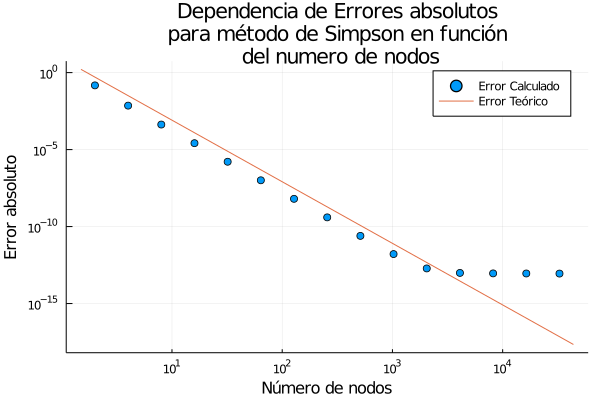

In [6]:
# Ahora calculo los errores absolutos utilizando el valor conocido de pi en un nuevo vector
I = 3.1415926535897
errores = abs.(Int_P1.-I)
# Y ya puedo graficar utilizando el vector N como abscisas y al vector errores como ordenada
# Utilizo escala logaritmica para una mejor visualización
scatter(N,errores, 
    xaxis=:log10,
    yaxis=:log10,
    xlabel="Número de nodos",
    ylabel="Error absoluto",
    title="    Dependencia de Errores absolutos 
    para método de Simpson en función 
    del numero de nodos",
    label="Error Calculado"
)
plot!(teorico, label="Error Teórico")

**1C)** Comente el resultado del punto anterior **(1B)**.

En El punto 1B vemos que el error teórico difiere del error calculado. Este fenomeno es debido a el error cometido por restar números muy proximos. En capitulos anteriores vimos como para este fenomeno existe un h óptimo, es decir, una diferencia óptima en la cual se encuentra la mayor precisión. En este caso, podemos ver que entre el ultimo valor por debajo de la recta y el primero por encima se debe encontrar un punto en el cual coinciden, ese punto representa el mejor h que podemos utilizar, solo que en función del numero de nodos en este intervalo. Pasado ese valor, los resultados y el valor exacto son muy próximos y empezamos a tener el problema de la diferenciación numérica antes mencionado.

# Volver a esto

## Problema 2

**2A)** Escriba las funciones pertinentes a los fines de resolver el 
problema de valor inicial:
$$
y^{\prime} = f(t,y), \qquad a\le t\le b, \qquad y(a)=\alpha
$$
que utilice los siguientes métodos: (debe definir una función que realize un paso de integración para cada método)
- método de Euler
- método de Heun (orden 3) dado por: 

    - $k_1 = hf(t,y_i)$
    
    - $k_2 = hf(t+h/3,y_i+k_1/3)$
    
    - $k_3 = hf(t+2h/3,y_i+2k_2/3)$
    
    - $y_{i+1} = y_i + (k_1+3k_3)/4$
    
- método de Runge-Kutta de segundo orden y
- método de Runge-Kutta de cuarto orden.

Las variables de la función que realiza la integración deben ser:
- el límite inferior del intervalo temporal, $a$,
- el límite superior del intervalo temporal, $b$,
- el valor inicial, $\alpha$, y
- el tamaño del paso de integración, $h$.

Dicha función debe retornar:
- el tiempo $t_i$,
- la aproximación $w_i$,
- la solución exacta $y(t_i)$ y
- el error absoluto $\varepsilon_i = |y(t_i) - w_i|$.


In [7]:
# Primero definimos la funcion ODEproblem que contiene la estructura del método.
# Luego podemos definir un paso para cada método.
function ODEproblem(Method::Function, # Será el método que realizara el paso
        f::Function,          # La función que es igual a la derivada de y, como el enunciado
        y0::Float64,          # Valor inicial
        a::Float64,           # Límite inferior del intervalo
        b::Float64,           # Límite superior del intervalo
        h::Float64,           # Ancho entre cada punto  
        Sol_Exacta::Function  # Agregamos esto para poder calcular los errores
    )
    
    N = Int64((b-a)/h + 1) # Definimos el número de puntos
    y = zeros(N)
    t = zeros(N)
    y[1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[i] = Method(f,y[i-1],t[i-1],h)  # y aca se realiza el paso, donde Method es cada metodo a elegir
    end
    y_exac = Sol_Exacta.(t) # Creamos un vector con el valor de la solución exacta en cada punto
    
    # Tengo mis dudas de como funciona la resta entre vectores en Julia, asi que para no cometer errores
    # Realizo la evaluación del error con un for
    err_abs = zeros(N)
    for i ∈ 1:N
        err_abs[i] = abs(y_exac[i]-y[i])
    end
    return (t[:] ,y[:], y_exac[:], err_abs[:])
end

ODEproblem (generic function with 1 method)

In [8]:
# Ahora definimos todos los métodos para los pasos:
# Método de Euler
function Euler(f::Function,y0,t0,h)
    return y0 + h*f(y0,t0) 
end


# Método de Heun de orde 3:
function Heun3(f::Function,y0,t0,h)
    k1 = h*f(y0,t0)
    k2 = h*f(y0+k1/3,t0+h/3)
    k3 = h*f(y0+k2*2/3,t0+h*2/3)
    return y0 + (k1+3*k3)/4
end


# Método de Runge Kutta de orden 2
function RK2(f::Function,y0,t0,h)
    k = h*f(y0,t0)
    return y0 + h*f(y0+(k/2),t0+(h/2))
end


# Método de Runge Kutta de orden 4
function RK4(f::Function,y0,t0,h)
    k1 = h*f(y0,t0)
    k2 = h*f(y0+k1/2,t0+h/2)
    k3 = h*f(y0+k2/2,t0+h/2)
    k4 = h*f(y0+k3,t0+h)
    return y0+(k1+2*k2+2*k3+k4)/6
end

RK4 (generic function with 1 method)

**2B)**
Utilice el programa del punto **(2A)** para resolver el problema de valor inicial:
$$
y^{\prime} = \frac{2-2ty}{t^2+1} \qquad 0\le t \le 1, \qquad y(0)=1
$$
con los tres(Cuatro)  métodos y con $h=0.1$. La solución exacta de este problema es:
$$
y_{e}(t) = \frac{2t+1}{t^2+1}
$$

In [9]:
f(y,t) = (2-2*t*y)/(t^2+1)
exacta(t) = (2t+1)/(t^2+1)
y0 = 1.0
a = 0.0
b = 1.0
h = 0.1
t,euler,exact,errEuler = ODEproblem(Euler,f,y0,a,b,h,exacta)
t,rungeKutta2,exact,errRK2 = ODEproblem(RK2,f,y0,a,b,h,exacta)
t,rungeKutta4,exact,errRK4 = ODEproblem(RK4,f,y0,a,b,h,exacta)
t,heun3,exact,errHeun = ODEproblem(Heun3,f,y0,a,b,h,exacta);
# Defino varias veces t, pero es el mismo para todos los métodos porque tienen los mismos parámetros.
# Lo mismo para la funcion exacta, al ser los mismos puntos, exact es siempre igual

**2C)** Grafique simultáneamente las tres aproximaciones a la
solución del problema de valor inicial planteado, con $0\le t\le 5(1)$, una por método, más la curva de la solución exacta. 
Para cada curva aproximada use diferentes tipos de puntos de 
tamaños adecuados y de diferentes colores. 
Grafique la curva exacta con una línea continua negra de ancho suficiente para que sea visible.

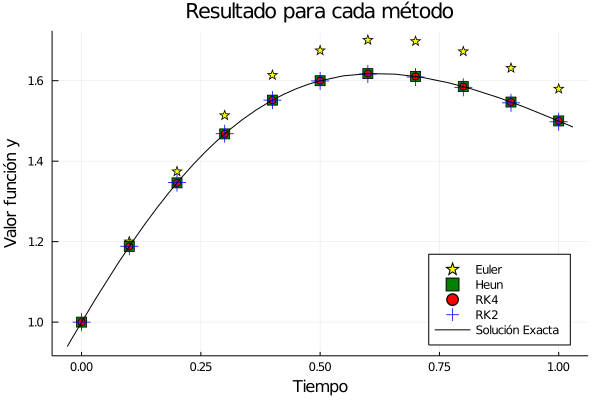

In [10]:
scatter(t,euler,color=:yellow, marker=:star, ms=5, label="Euler",
    legend=:bottomright,
    title="Resultado para cada método",
    ylabel="Valor función y",
    xlabel="Tiempo"
)
scatter!(t,heun3,color=:green, marker=:square, ms=5, label="Heun")
scatter!(t,rungeKutta4,color=:red, marker=:dot, label="RK4")
scatter!(t,rungeKutta2,color=:blue, marker=:cross, ms=9, label="RK2")
plot!(exacta, lw=1, label="Solución Exacta", color=:black)

# Puse el cuadrado mas grande para que sea vea bien donde estan los demas puntos,
# El circulo rojo de RK4 y la cruz de RK2 estan encima del cuadrado verde de Heun

**2D)** Grafique las cuatro curvas del error absoluto en escala logarítmica y superpuestas, una por método, con $0\le t\le $5 y **h=0.01**. 
Para cada curva del error use diferentes tipos de puntos de tamaños adecuados y de diferentes colores. Repita para el error relativo.

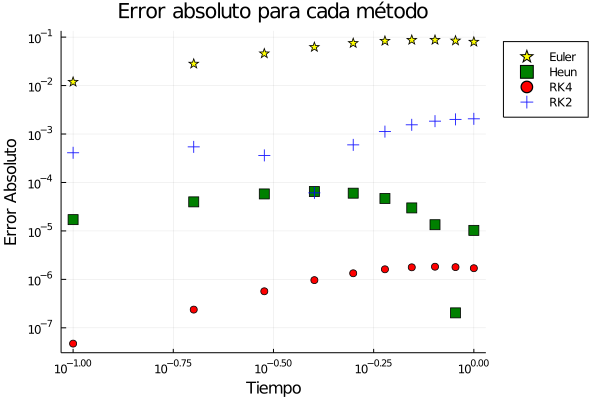

In [11]:
scatter(t[2:end],errEuler[2:end],color=:yellow, marker=:star, ms=5, label="Euler",
    legend=:outertopright,
    title="Error absoluto para cada método",
    ylabel="Error Absoluto",
    xlabel="Tiempo",
    xaxis=:log10,
    yaxis=:log10
)
scatter!(t[2:end],errHeun[2:end],color=:green, marker=:square, ms=5, label="Heun")
scatter!(t[2:end],errRK4[2:end],color=:red, marker=:dot, label="RK4")
scatter!(t[2:end],errRK2[2:end],color=:blue, marker=:cross, ms=6, label="RK2")

In [12]:
# Para el error relativo debo definirlo, pero tengo cuanto vale la función exacta para cada punto
errEulerRel = errEuler./(abs.(exact))
errHeunRel = errHeun./(abs.(exact))
errRK4Rel = errRK4./(abs.(exact))
errRK2Rel = errRK2./(abs.(exact));

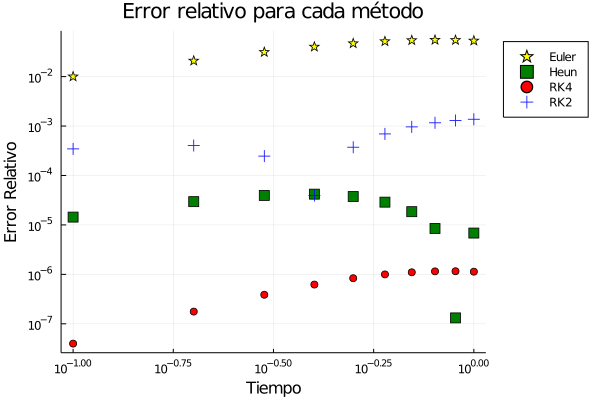

In [13]:
scatter(t[2:end],errEulerRel[2:end],color=:yellow, marker=:star, ms=5, label="Euler",
    legend=:outertopright,
    title="Error relativo para cada método",
    ylabel="Error Relativo",
    xlabel="Tiempo",
    xaxis=:log10,
    yaxis=:log10
)
scatter!(t[2:end],errHeunRel[2:end],color=:green, marker=:square, ms=5, label="Heun")
scatter!(t[2:end],errRK4Rel[2:end],color=:red, marker=:dot, label="RK4")
scatter!(t[2:end],errRK2Rel[2:end],color=:blue, marker=:cross, ms=6, label="RK2")

Se puede ver que varian poco los valores porque los valores de la función exacta son cercanos a 1, entonces ningun error relativo llega a ser menor a la mitad de el error absoluto del mismo punto, pero igual se ve que disminuyen los valores